In [1]:
from trackthenews import *

In [13]:
sample_text = ['がんばったら報われるとあなたがたが思えることそのものが、',
               'あなたがたの努力の成果ではなく、',
               '環境のおかげだったこと忘れないようにしてください']

In [14]:
matchwords = ['報われる','努力']

In [15]:
collections = []
for text in sample_text:
    if any(word.lower() in text.lower() for word in matchwords):
        collections.append(text)

In [16]:
collections

['がんばったら報われるとあなたがたが思えることそのものが、', 'あなたがたの努力の成果ではなく、']

In [3]:
graf = 'This afternoon at E3 in Los Angeles, I watched an extended demo of the Final Fantasy VII remake and got my hands on a build for about 15 minutes. Here’s the good news: It could be really special. The bad news: We have no idea when the whole project will be completed.'

In [4]:
graf_2 = 'がんばったら報われるとあなたがたが思えることそのものが、あなたがたの努力の成果ではなく、環境のおかげだったこと忘れないようにしてください'

In [5]:
graf_3 = '「あなたたちはがんばれば報われると思ってここまで来たはずです。ですが、冒頭で不正入試に触れたとおり、がんばってもそれが公正に報われない社会があなたたちを待っています」「がんばったら報われるとあなたがたが思えることそのものが、あなたがたの努力の成果ではなく、環境のおかげだったこと忘れないようにしてください」「世の中には、がんばっても報われないひと、がんばろうにもがんばれないひと、がんばりすぎて心と体をこわしたひとたちがいます。がんばる前から、『しょせんおまえなんか』『どうせわたしなんて』とがんばる意欲をくじかれるひとたちもいます」「あなたたちのがんばりを、どうぞ自分が勝ち抜くためだけに使わないでください。恵まれた環境と恵まれた能力とを、恵まれないひとびとを貶めるためにではなく、そういうひとびとを助けるために使ってください」'

In [6]:
configfile = '/Users/um003721/Desktop/trackthenews/ttnconfig/config.yaml'

In [7]:
with open(configfile, encoding="utf-8") as f:
    config = yaml.load(f)

In [8]:
def get_textsize(graf, width, fnt, spacing):
    """Take text and additional parameters and return the rendered size."""
    
    wrapped_graf = textwrap.wrap(graf, width)

    line_spacing = fnt.getsize('A')[1] + spacing
    text_width = max(fnt.getsize(line)[0] for line in wrapped_graf)
    text_height = line_spacing * len(wrapped_graf)
    
    while text_width > 2*text_height:
        width = width-1
        wrapped_graf = textwrap.wrap(graf, width)
        line_spacing = fnt.getsize('A')[1] + spacing
        text_width = max(fnt.getsize(line)[0] for line in wrapped_graf)
        text_height = line_spacing * len(wrapped_graf)
    
    while text_width < 2*text_height:
        width = width+1
        wrapped_graf = textwrap.wrap(graf, width)
        line_spacing = fnt.getsize('A')[1] + spacing
        text_width = max(fnt.getsize(line)[0] for line in wrapped_graf)
        text_height = line_spacing * len(wrapped_graf)
        
    textsize = text_width, text_height
        
    return textsize, width

In [9]:
font_path = '/Users/um003721/Desktop/trackthenews/trackthenews/fonts/YuMincho.ttc'

In [10]:
len(graf)**.66

39.94821996081615

In [11]:
wrapped_graf_1 = textwrap.wrap(graf, width=40)
wrapped_graf_1

['This afternoon at E3 in Los Angeles, I',
 'watched an extended demo of the Final',
 'Fantasy VII remake and got my hands on a',
 'build for about 15 minutes. Here’s the',
 'good news: It could be really special.',
 'The bad news: We have no idea when the',
 'whole project will be completed.']

In [12]:
len(graf_2)**.66

16.197794409638348

In [13]:
wrapped_graf_2 = textwrap.wrap(graf_2, width=17)
wrapped_graf_2

['がんばったら報われるとあなたがたが',
 '思えることそのものが、あなたがたの',
 '努力の成果ではなく、環境のおかげだ',
 'ったこと忘れないようにしてください']

In [14]:
len(graf_3)**.66

49.103595163105645

In [15]:
wrapped_graf_3 = textwrap.wrap(graf_3, width=50)
wrapped_graf_3

['「あなたたちはがんばれば報われると思ってここまで来たはずです。ですが、冒頭で不正入試に触れたとおり、',
 'がんばってもそれが公正に報われない社会があなたたちを待っています」「がんばったら報われるとあなたがた',
 'が思えることそのものが、あなたがたの努力の成果ではなく、環境のおかげだったこと忘れないようにしてくだ',
 'さい」「世の中には、がんばっても報われないひと、がんばろうにもがんばれないひと、がんばりすぎて心と体',
 'をこわしたひとたちがいます。がんばる前から、『しょせんおまえなんか』『どうせわたしなんて』とがんばる',
 '意欲をくじかれるひとたちもいます」「あなたたちのがんばりを、どうぞ自分が勝ち抜くためだけに使わないで',
 'ください。恵まれた環境と恵まれた能力とを、恵まれないひとびとを貶めるためにではなく、そういうひとびと',
 'を助けるために使ってください」']

In [16]:
fnt = ImageFont.truetype(font_path, size=36)
fnt.getsize('君の名は')

(144, 35)

In [89]:
def render_img(graf, width=60, square=False):
    """Take a paragraph and render an Image of it on a plain background."""
    font_name = config['font']
    # font_dir = os.path.join(os.path.dirname("__file__"), 'fonts')
    font_path = '/Users/um003721/Desktop/trackthenews/trackthenews/fonts/YuMincho.ttc'
    fnt = ImageFont.truetype(font_path, size=36)
    spacing = 12  # Just a nice spacing number, visually

    graf = graf.lstrip('#>—-• ')


    textsize, new_width = get_textsize(graf, width, fnt, spacing)
    wrapped = '\n'.join(textwrap.wrap(graf, new_width))

    starters = tuple(0.25*side for side in textsize)
    correction_ratio = 2*starters[1]/starters[0]
    borders = tuple((int(correction_ratio*starters[0]),int(starters[1])))
    
    #size = tuple(side + border * 2 for side in textsize)
    size = tuple((textsize[0] + 2*borders[0], textsize[1] + 2*borders[1]))
#     xy = (borders[0], borders[1])
    
    framesize = [500, 250]
    
    while framesize[0] < textsize[0] + 60 or framesize[1] < textsize[1] + 60:
        framesize[0] += 20
        framesize[1] = int(framesize[0]/2)
    
    adjusted_frame = tuple(framesize)
    print(adjusted_frame)
    
    xy = (int((adjusted_frame[0]-textsize[0])/2), int((adjusted_frame[1]-textsize[1])/2))

    #im = Image.new('RGB', size, color=config['color'])
    respo = requests.get('https://i.kinja-img.com/gawker-media/image/upload/s--NZGbBO7F--/c_scale,f_auto,fl_progressive,q_80,w_800/rrphb8nf2zqlt3zrxij2.png')
    
    im = Image.open((BytesIO(respo.content)))
    
    ratio = im.size[0]/im.size[1]
    print(ratio)
    
    if im.size[0] < adjusted_frame[0] or im.size[1] < adjusted_frame[1]:
        if im.size[0] < im.size[1]:
            im = im.resize(size=(adjusted_frame[0],int(adjusted_frame[0]/ratio)))
        else:
            im = im.resize(size=(int(adjusted_frame[0]*ratio),adjusted_frame[0]))
    
    im = im.crop(box=(0,0,adjusted_frame[0],adjusted_frame[1]))
    
    im = Image.eval(im, lambda x: x/4)
    
    new_size = (adjusted_frame[0],adjusted_frame[1])
    
   # mask = Image.new('L', new_size, color=config['color'])
    draw_obj = ImageDraw.Draw(im)
    draw_obj.multiline_text(xy, wrapped, fill='#FFFFFF', font=fnt, spacing=12)

   # im.putalpha(mask)

    return im

(580, 290)
1.6427104722792607


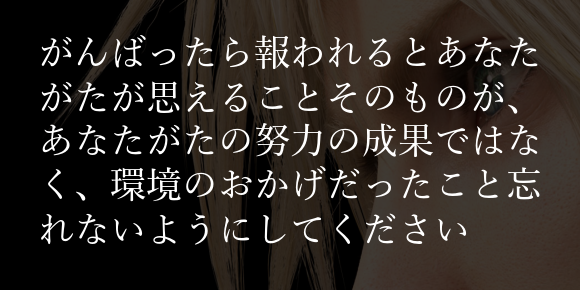

In [90]:
render_img(graf_2, width=18)

(760, 380)
1.6427104722792607


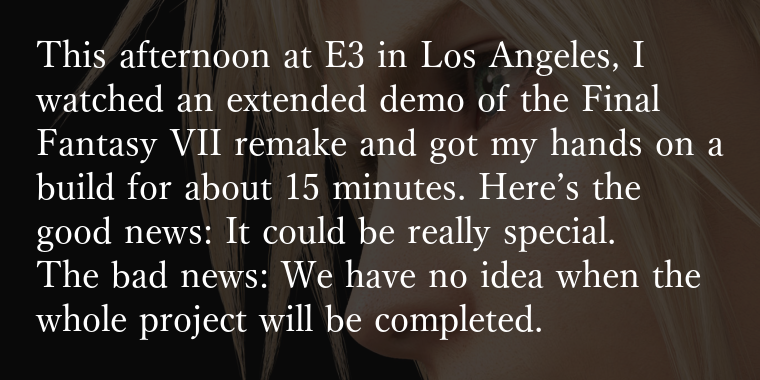

In [61]:
render_img(graf, width=17)

(1180, 590)
1.6427104722792607


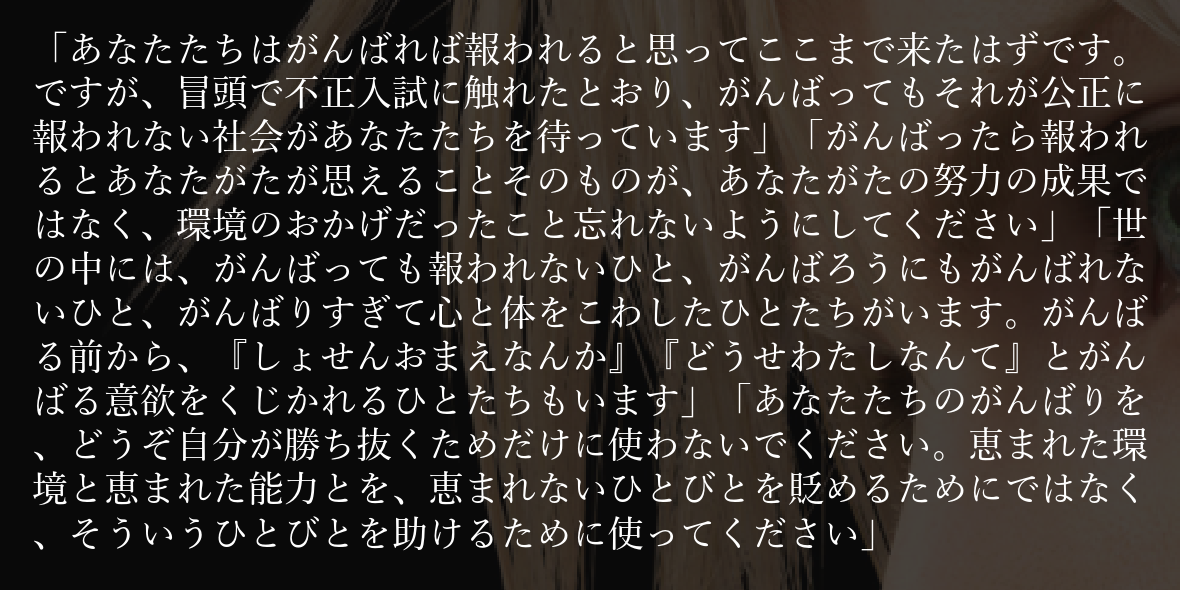

In [62]:
render_img(graf_3, width=20)

In [2]:
url = 'https://www.buzzfeed.com/jp/keiyoshikawa/sichuan-eq'

In [3]:
res = requests.get(url, timeout=30)
doc = Document(res.text)

h = html2text.HTML2Text()
h.ignore_links = True
h.ignore_emphasis = True
#h.ignore_images = True
h.body_width = 0

plaintext = h.handle(doc.summary())

In [7]:
soup = BeautifulSoup(res.text, 'lxml')

images = []
for img in soup.findAll('img'): 
    link = img.get('data-src') 
    try:
        if link[:6]=='https:':
            images.append(link)
        else:
            continue
    except TypeError:
        continue
        
urls_list = []
for img in images:
    reqs = requests.get(img)
    try:
        new_img = Image.open((BytesIO(reqs.content)))
    except OSError:
        continue
    img_size = new_img.size[0]*new_img.size[1]
    if img_size < 200000:
        continue
    else:
        urls_list.append(img)        

if urls_list != []:
    my_image_url = urls_list[0]
    
print(len(urls_list))
print(len(images))
print(images)

14
14
['https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-04/sub-buzz-13590-1560829821-1.jpg', 'https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-05/sub-buzz-3251-1560829818-1.jpg', 'https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-02/sub-buzz-8450-1560829817-3.jpg', 'https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-02/sub-buzz-8450-1560829816-1.jpg', 'https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-06/sub-buzz-16021-1560829828-1.jpg', 'https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-05/sub-buzz-3305-1560829820-1.jpg', 'https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-02/sub-buzz-8442-1560829824-1.jpg', 'https://img.buzzfeed.com/buzzfeed-static/static/2019-06/17/23/asset/buzzfeed-prod-web-05/sub-buzz-3118-1560829814-1.jpg', 'https:

soup = BeautifulSoup(res.text, 'lxml')
images = []
for img in soup.findAll('img'): 
    link = img.get('data-srcset') #src
    try:
        links = link.split(' ')
    except AttributeError:
        continue
    for ll in links:
        try:
            if ll[:6]=='https:':
                images.append(ll)
            else:
                continue
        except TypeError:
            continue 
print(len(images))

In [29]:
images[4].split(' ')

['https://i.kinja-img.com/gawker-media/image/upload/s--y9S3ujim--/c_scale,f_auto,fl_progressive,q_80,w_800/tvrso2scwfr22zvuct7q.png']

In [30]:
emptylist = [0,0,1]
if emptylist!=[]:
    print('ok')

ok


In [2]:
respo = requests.get('https://i.kinja-img.com/gawker-media/image/upload/s--NZGbBO7F--/c_scale,f_auto,fl_progressive,q_80,w_800/rrphb8nf2zqlt3zrxij2.png')

In [32]:
cloud = Image.open((BytesIO(respo.content)))

In [33]:
cloud.size[0]*cloud.size[1]

389600

In [3]:
urls_list = []
for i in images:
    reqs = requests.get(i)
    try:
        new_img = Image.open((BytesIO(reqs.content)))
    except OSError:
        continue
    img_size = new_img.size[0]*new_img.size[1]
    if img_size < 200000:
        continue
    else:
        urls_list.append(i)
    

NameError: name 'images' is not defined

In [35]:
urls_list

['https://i.kinja-img.com/gawker-media/image/upload/s--NZGbBO7F--/c_scale,f_auto,fl_progressive,q_80,w_800/rrphb8nf2zqlt3zrxij2.png',
 'https://i.kinja-img.com/gawker-media/image/upload/s--NZGbBO7F--/c_scale,f_auto,fl_progressive,q_80,w_800/rrphb8nf2zqlt3zrxij2.png',
 'https://i.kinja-img.com/gawker-media/image/upload/s--UGChVXQt--/c_scale,f_auto,fl_progressive,q_80,w_800/cegxj79wxk3tstnmvsj1.png',
 'https://i.kinja-img.com/gawker-media/image/upload/s--UGChVXQt--/c_scale,f_auto,fl_progressive,q_80,w_800/cegxj79wxk3tstnmvsj1.png',
 'https://i.kinja-img.com/gawker-media/image/upload/s--y9S3ujim--/c_scale,f_auto,fl_progressive,q_80,w_800/tvrso2scwfr22zvuct7q.png',
 'https://i.kinja-img.com/gawker-media/image/upload/s--y9S3ujim--/c_scale,f_auto,fl_progressive,q_80,w_800/tvrso2scwfr22zvuct7q.png',
 'https://i.kinja-img.com/gawker-media/image/upload/s--Ybz8DfHi--/c_scale,f_auto,fl_progressive,q_80,w_800/rxlhtajdlx40wp2paqlk.png',
 'https://i.kinja-img.com/gawker-media/image/upload/s--Ybz8DfH